# Homework DataTalksClub - MLZoomcamp - Week3

Instructions at https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/course-zoomcamp/cohorts/2022/03-classification/homework.md

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

housing = pd.read_csv('data/housing.csv')

In [2]:
# Features - Keep only the given columns and fill the missing values with zero
features_to_be_used = ['latitude', 'longitude', 'housing_median_age', 'total_rooms',
'total_bedrooms', 'population', 'households', 'median_income','median_house_value', 'ocean_proximity',]

housing = housing[features_to_be_used]
housing.fillna(0)
housing.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_household'] = housing['total_bedrooms'] / housing['households']
housing['population_per_household'] = housing['population'] / housing['households']


## Question 1
What is the most frequent observation (mode) for the column ocean_proximity?

In [4]:
# Q1
housing['ocean_proximity'].mode()

0    <1H OCEAN
dtype: object

## Question 2

Create the correlation matrix for the numerical features of your train dataset.
In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
What are the two features that have the biggest correlation in this dataset?

In [5]:
# Q2

housing.corr()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_household,population_per_household
latitude,1.000000,-0.924664,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160,0.106389,0.070025,0.002366
longitude,-0.924664,1.000000,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967,-0.027540,0.013402,0.002476
housing_median_age,0.011173,-0.108197,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623,-0.153277,-0.077918,0.013191
total_rooms,-0.036100,0.044568,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153,0.133798,0.029373,-0.024581
total_bedrooms,-0.066983,0.069608,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.001538,0.045887,-0.028355
population,-0.108785,0.099773,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650,-0.072213,-0.066510,0.069863
households,-0.071035,0.055310,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843,-0.080598,-0.055158,-0.027309
median_income,-0.079809,-0.015176,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075,0.326895,-0.062299,0.018766
median_house_value,-0.144160,-0.045967,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000,0.151948,-0.046739,-0.023737
rooms_per_household,0.106389,-0.027540,-0.153277,0.133798,0.001538,-0.072213,-0.080598,0.326895,0.151948,1.000000,0.848616,-0.004852


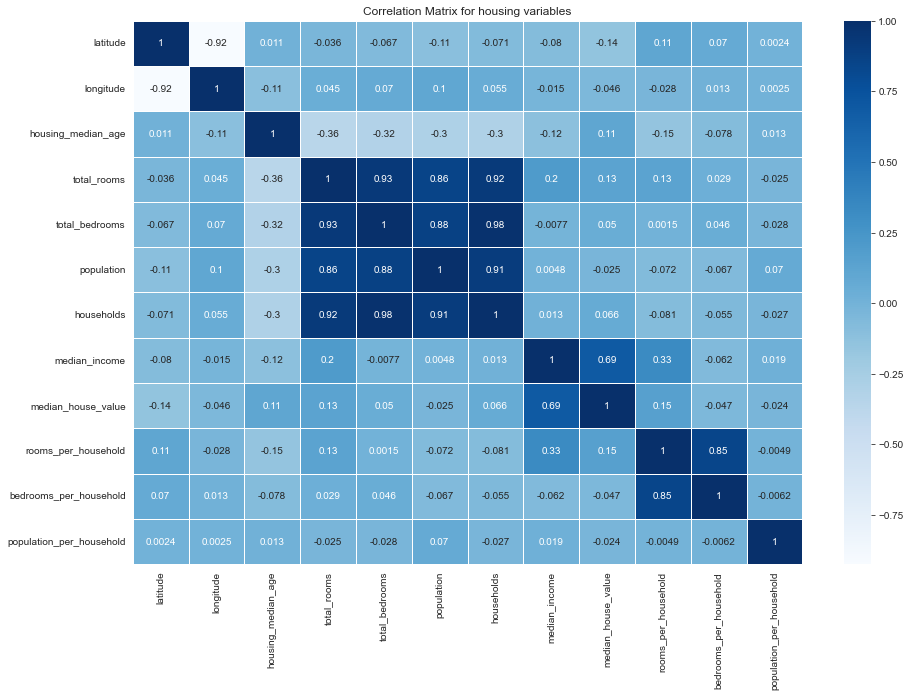

In [6]:
plt.figure(figsize=(15,10))
sns.heatmap(housing.corr(), annot=True, linewidths=0.5, cmap="Blues")
plt.title('Correlation Matrix for housing variables')
plt.show()

Solution: total_bedrooms and housholds (0.98)

In [7]:
# Another way to check it. You might need to open it in another tab to view full output.
housing.corr().unstack().sort_values(ascending = False)

latitude                latitude                  1.000000
longitude               longitude                 1.000000
bedrooms_per_household  bedrooms_per_household    1.000000
rooms_per_household     rooms_per_household       1.000000
median_house_value      median_house_value        1.000000
                                                    ...   
housing_median_age      total_bedrooms           -0.320451
total_rooms             housing_median_age       -0.361262
housing_median_age      total_rooms              -0.361262
latitude                longitude                -0.924664
longitude               latitude                 -0.924664
Length: 144, dtype: float64

### Make median_house_value binary
- We need to turn the median_house_value variable from numeric into binary.
- Let's create a variable above_average which is 1 if the median_house_value is above its mean value and 0 otherwise.
### Split the data
- Split your data in train/val/test sets, with 60%/20%/20% distribution.
- Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
- Make sure that the target value (median_house_value) is not in your dataframe.

In [8]:
# Make median_house_value binary
housing_mean_pricing = housing['median_house_value'].mean()
housing_mean_pricing

206855.81690891474

In [9]:
housing[housing['median_house_value'] >= housing_mean_pricing]

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_household,population_per_household
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,1.023810,2.555556
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.971880,2.109842
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,1.073446,2.802260
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,1.073059,2.547945
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,1.081081,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20544,38.55,-121.76,23.0,8800.0,1857.0,6330.0,1832.0,2.0650,219400.0,INLAND,4.803493,1.013646,3.455240
20545,38.55,-121.75,26.0,4802.0,950.0,2199.0,939.0,3.7452,227700.0,INLAND,5.113951,1.011715,2.341853
20565,38.65,-121.70,22.0,1360.0,282.0,808.0,229.0,2.4167,225000.0,INLAND,5.938865,1.231441,3.528384
20573,38.56,-122.05,20.0,1005.0,168.0,457.0,157.0,5.6790,225000.0,INLAND,6.401274,1.070064,2.910828


In [10]:
housing.loc[housing['median_house_value'] >= housing_mean_pricing, 'above_average'] = 1
housing.fillna(0, inplace=True)
housing.isna().sum()
# housing['above_average'].sum()

latitude                    0
longitude                   0
housing_median_age          0
total_rooms                 0
total_bedrooms              0
population                  0
households                  0
median_income               0
median_house_value          0
ocean_proximity             0
rooms_per_household         0
bedrooms_per_household      0
population_per_household    0
above_average               0
dtype: int64

In [11]:
# Make sure the target value is not present in your dataframe
housing_median = housing.copy()
del housing['median_house_value']

# Spit the data - 60%/20%/20%
from sklearn.model_selection import train_test_split

In [12]:
housing_train_full, housing_test = train_test_split(housing, test_size=0.2, random_state=42)
housing_train, housing_val = train_test_split(housing, test_size=0.25, random_state=42)

In [13]:
y_train = housing_train['above_average'].values
y_val = housing_val['above_average'].values
y_test = housing_test['above_average'].values

In [14]:
housing_train = housing_train.reset_index(drop=True)
housing_val = housing_val.reset_index(drop=True)
housing_test = housing_test.reset_index(drop=True)

## Question 3

- Calculate the mutual information score with the (binarized) price for the categorical variable that we have. Use the training set only.
- What is the value of mutual information?
- Round it to 2 decimal digits using round(score, 2)


In [15]:
from sklearn.metrics import mutual_info_score

categories = ['ocean_proximity', 'above_average']

In [16]:
def calculate_mi (series):
    return mutual_info_score(series, housing_train.above_average)

housing_mi = housing_train[categories].apply(calculate_mi)
housing_mi = housing_mi.sort_values(ascending=False).to_frame(name='MI')
housing_mi

,MI
above_average,0.675471
ocean_proximity,0.101934


## Question 4
Now let's train a logistic regression. Remember that we have one categorical variable ocean_proximity in the data. Include it using one-hot encoding.
Fit the model on the training dataset. To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
- model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
- Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

In [17]:
# Q4
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [18]:
num = ['latitude', 'longitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','rooms_per_household','bedrooms_per_household','population_per_household']

train_dict = housing_train[categories + num].to_dict(orient='records')

dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)

In [19]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

val_dict = housing_val[categories + num].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict(X_val)

accuracy = np.round(accuracy_score(y_val, y_pred),2)
print(accuracy)

1.0


# Q5
Let's find the least useful feature using the feature elimination technique.
Train a model with all these features (using the same parameters as in Q4).
Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
For each feature, calculate the difference between the original accuracy and the accuracy without the feature.
Which of following feature has the smallest difference?


In [20]:
# Q5

features = categories + num
features

['ocean_proximity',
 'above_average',
 'latitude',
 'longitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_household',
 'bedrooms_per_household',
 'population_per_household']

In [21]:
orig_score = accuracy


for c in features:
    subset = features.copy()
    subset.remove(c)

    train_dict = housing_train[subset].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    dv.fit(train_dict)

    X_train = dv.transform(train_dict)

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    val_dict = housing_val[subset].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    y_pred = model.predict(X_val)

    score = accuracy_score(y_val, y_pred)
    print(c, orig_score - score, score)

ocean_proximity 0.0 1.0
above_average 0.16375968992248058 0.8362403100775194
latitude 0.0 1.0
longitude 0.0 1.0
housing_median_age 0.0 1.0
total_rooms 0.0 1.0
total_bedrooms 0.00019379844961242565 0.9998062015503876
population 0.0 1.0
households 0.0 1.0
median_income 0.0 1.0
rooms_per_household 0.0 1.0
bedrooms_per_household 0.0 1.0
population_per_household 0.0 1.0


# Q6

For this question, we'll see how to use a linear regression model from Scikit-Learn
We'll need to use the original column 'median_house_value'. Apply the logarithmic transformation to this column.
Fit the Ridge regression model (model = Ridge(alpha=a, solver="sag", random_state=42)) on the training data.
This model has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10]
Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.
If there are multiple options, select the smallest alpha.

In [22]:
# Q6
housing['median_house_value'] = np.log1p(housing_median['median_house_value'])


In [23]:
housing_train_full, housing_test = train_test_split(housing, test_size=0.2, random_state=42)
housing_train, housing_val = train_test_split(housing_train_full, test_size=0.25, random_state=42)
housing_train = housing_train.reset_index(drop=True)
housing_val = housing_val.reset_index(drop=True)
housing_test = housing_test.reset_index(drop=True)
y_train = housing_train.median_house_value.values
y_val = housing_val.median_house_value.values
y_test = housing_test.median_house_value.values
del housing_train['median_house_value']
del housing_val['median_house_value']
del housing_test['median_house_value']

In [26]:
# Ridge

train_dict = housing_train[categories + num].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)

val_dict = housing_val[categories + num].to_dict(orient='records')
X_val = dv.transform(val_dict)
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
for a in [0, 0.01, 0.1, 1, 10]:
    model = Ridge(alpha=a,random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)

    score = np.sqrt(mean_squared_error(y_val, y_pred))

    print(a, round(score, 3))

0 0.26
0.01 0.26
0.1 0.26
1 0.26
10 0.26


c:\users\mi pc\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=9.38149e-24): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
